<a href="https://colab.research.google.com/github/gb08/Deep_learning_with_Colab/blob/master/tensorflow_mnist_fashion_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !pip install -U -q PyDrive
from google.colab import drive

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
from tensorflow import keras  # tf.keras
import time

In [0]:
drive.mount('/content/gdrive')
#!ls gdrive/My\ Drive

model_path = '/content/gdrive/My Drive/tensorflow_mnist_model/'

In [0]:

%matplotlib inline
%load_ext tensorboard

Check Python and keras version

In [15]:
print("python", sys.version)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

python 3.6.8 (default, Oct  7 2019, 12:59:55) 
[GCC 8.3.0]
matplotlib 3.1.1
numpy 1.17.4
pandas 0.25.3
sklearn 0.21.3
tensorflow 1.15.0
tensorflow.python.keras.api._v1.keras 2.2.4-tf


Load mnist fashion dataset

In [16]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (
    fashion_mnist.load_data())


4423680/4422102 [==============================] - 0s 0us/step


Devide dataset into trai and test set

In [0]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [0]:

X_train.shape

(55000, 28, 28)

Plot first image from training dataset

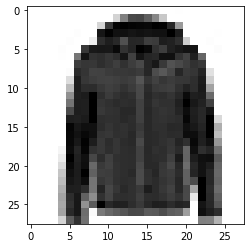

In [0]:
plt.imshow(X_train[0], cmap="binary")
plt.show()

Define Class names.

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [0]:
class_names[y_train[0]]

'Coat'

Glimpse of dataset images

In [1]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols*1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.show()

NameError: ignored

**Intialize Keras Model**
**Add flatten input layer**
**Add First hidden layer with 300 neurons, activation fnc ReLu**

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


**Add Output Layer with 10 neurons(one for each class) with activation fnc Softmax**

In [0]:
model.add(keras.layers.Dense(10, activation="softmax"))

Check Model Summary

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


Plot Model

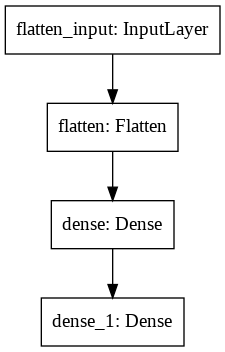

In [0]:
keras.utils.plot_model(model)

Compile Model, Set loss fnc avaible in keras, optimizer(SGD with learning rate 1e-3) and metrics as accuracy 

In [0]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

Fit Model, Set values for Number of epochs also provide validation set, model will return history object containing statistics

In [0]:
history = model.fit(epochs=10, x=X_train, y=y_train, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 108us/sample - loss: 3.5390 - acc: 0.6738 - val_loss: 1.0418 - val_acc: 0.7180
Epoch 2/10
55000/55000 [==============================] - 5s 95us/sample - loss: 0.6742 - acc: 0.7529 - val_loss: 0.6732 - val_acc: 0.7610
Epoch 3/10
55000/55000 [==============================] - 5s 95us/sample - loss: 0.6032 - acc: 0.7763 - val_loss: 0.6798 - val_acc: 0.7864
Epoch 4/10
55000/55000 [==============================] - 5s 98us/sample - loss: 0.5652 - acc: 0.7910 - val_loss: 0.6236 - val_acc: 0.7696
Epoch 5/10
55000/55000 [==============================] - 5s 97us/sample - loss: 0.5397 - acc: 0.7967 - val_loss: 0.5722 - val_acc: 0.8074
Epoch 6/10
55000/55000 [==============================] - 5s 94us/sample - loss: 0.5214 - acc: 0.8027 - val_loss: 0.6041 - val_acc: 0.7780
Epoch 7/10
55000/55000 [==============================] - 5s 94us/sample - loss: 0.5025 - acc: 0.8097 - val_loss: 0.

Plot learning Curves

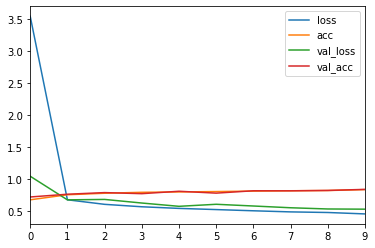

In [0]:
pd.DataFrame(history.history).plot()

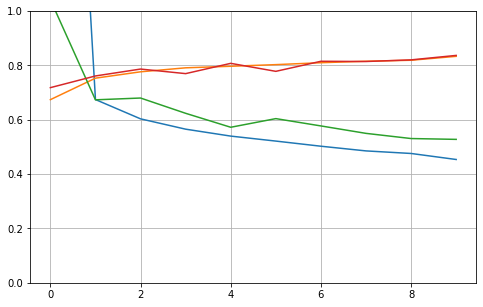

In [0]:
plt.figure(figsize=(8,5)); plt.grid(True); plt.gca().set_ylim(0, 1); plt.plot(pd.DataFrame(history.history));

In [0]:
Train model for few more epochs, it will start where left last time

In [0]:
history = model.fit(epochs=10, x=X_train, y=y_train, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 96us/sample - loss: 0.4315 - acc: 0.8443 - val_loss: 0.5093 - val_acc: 0.8416
Epoch 2/10
55000/55000 [==============================] - 5s 93us/sample - loss: 0.4200 - acc: 0.8495 - val_loss: 0.5028 - val_acc: 0.8436
Epoch 3/10
55000/55000 [==============================] - 5s 94us/sample - loss: 0.4101 - acc: 0.8517 - val_loss: 0.5287 - val_acc: 0.8384
Epoch 4/10
55000/55000 [==============================] - 5s 94us/sample - loss: 0.4036 - acc: 0.8540 - val_loss: 0.4881 - val_acc: 0.8484
Epoch 5/10
55000/55000 [==============================] - 5s 95us/sample - loss: 0.3961 - acc: 0.8579 - val_loss: 0.5172 - val_acc: 0.8456
Epoch 6/10
55000/55000 [==============================] - 5s 93us/sample - loss: 0.3885 - acc: 0.8598 - val_loss: 0.5809 - val_acc: 0.8380
Epoch 7/10
55000/55000 [==============================] - 5s 93us/sample - loss: 0.3806 - acc: 0.8614 - val_loss: 0.5

Evaluate model on test set

In [0]:
evall = model.evaluate(x=X_test, y=y_test)

10000/10000 [==============================] - 1s 66us/sample - loss: 0.6139 - acc: 0.8083


In [0]:
X_new = X_test[0:10]

Predict values for few of the test samples

In [0]:
predicted_out = model.predict(X_new)

In [2]:
predicted_out.round(2)

NameError: ignored

Get class Ids of most likely class

In [0]:
np.argmax(predicted_out, axis=1)

array([9, 2, 1, 1, 6, 1, 4, 4, 5, 7])

Use predict class method directly

In [0]:
model.predict_classes(X_new)

array([9, 2, 1, 1, 6, 1, 4, 4, 5, 7])

Get Probabilities of predicted class

In [0]:
predicted_out.max(axis=1).round(2)

array([0.98, 0.66, 1.  , 1.  , 0.65, 1.  , 0.95, 0.55, 1.  , 1.  ],
      dtype=float32)

Get Top three predicted classes for image

In [46]:

k = 3
top_k = np.argsort(-predicted_out, axis=1)[:, :k]
top_k

array([[9, 7, 5],
       [2, 4, 6],
       [1, 3, 0],
       [1, 3, 0],
       [6, 4, 2],
       [1, 3, 0],
       [4, 6, 2],
       [4, 6, 2],
       [5, 8, 7],
       [7, 5, 9]])

Get probabilities of top K classes

In [0]:
row_indices = np.tile(np.arange(len(top_k)), [k, 1]).T
predicted_out[row_indices, top_k].round(2)

array([[0.98, 0.02, 0.  ],
       [0.66, 0.27, 0.06],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.65, 0.31, 0.03],
       [1.  , 0.  , 0.  ],
       [0.95, 0.04, 0.01],
       [0.55, 0.44, 0.01],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ]], dtype=float32)

**Now, Try with Standerdized dataset**

In [0]:
scaler = sklearn.preprocessing.StandardScaler()

Fit Scalar object on Training data and transform test and validation set

In [0]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32).reshape(-1, 28 * 28)).reshape(-1, 28, 28)
X_valid_scaled = scaler.transform(X_valid.astype(np.float32).reshape(-1, 28 * 28)).reshape(-1, 28, 28)
X_test_scaled = scaler.transform(X_test.astype(np.float32).reshape(-1, 28 * 28)).reshape(-1, 28, 28)

Build Model, With one more hidden Layer

In [26]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(1e-3), metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=10,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 6s 113us/sample - loss: 0.9298 - acc: 0.6977 - val_loss: 0.6256 - val_acc: 0.7910
Epoch 2/10
55000/55000 [==============================] - 5s 98us/sample - loss: 0.5787 - acc: 0.7975 - val_loss: 0.5233 - val_acc: 0.8238
Epoch 3/10
55000/55000 [==============================] - 5s 98us/sample - loss: 0.5068 - acc: 0.8203 - val_loss: 0.4782 - val_acc: 0.8364
Epoch 4/10
55000/55000 [==============================] - 5s 98us/sample - loss: 0.4676 - acc: 0.8339 - val_loss: 0.4526 - val_acc: 0.8466
Epoch 5/10
55000/55000 [==============================] - 5s 98us/sample - loss: 0.4415 - acc: 0.8441 - val_loss: 0.4331 - val_acc: 0.8504
Epoch 6/10
55000/55000 [==============================] - 5s 99us/sample - loss: 0.4223 - acc: 0.8508 - val_loss: 0.4187 - val_acc: 0.8578
Epoch 7/10
55000/55000 [==============================] - 5s 98us/sample - loss: 0.4072 - acc: 0.8562 - val_loss: 0.

In [0]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

Plot Learning Curves for this model

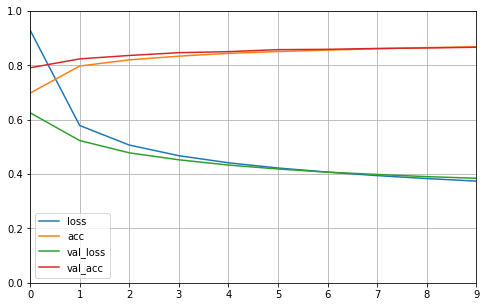

In [28]:
plot_learning_curves(history)

In [29]:
# model_path

'/content/gdrive/My Drive/tensorflow_model_1/'

Train model with Callback. Provide Google drive path for log directory and model checkpoints, save best model

In [30]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(1e-3), metrics=["accuracy"])


logdir = os.path.join(model_path, "run_{}".format(time.time()))

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.EarlyStopping(patience=5),
    keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True),
]
history_c = model.fit(X_train_scaled, y_train, epochs=50,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 6s 113us/sample - loss: 0.9698 - acc: 0.6931 - val_loss: 0.6395 - val_acc: 0.7880
Epoch 2/50
55000/55000 [==============================] - 6s 105us/sample - loss: 0.5867 - acc: 0.8007 - val_loss: 0.5384 - val_acc: 0.8168
Epoch 3/50
55000/55000 [==============================] - 6s 109us/sample - loss: 0.5131 - acc: 0.8200 - val_loss: 0.4913 - val_acc: 0.8332
Epoch 4/50
55000/55000 [==============================] - 6s 104us/sample - loss: 0.4733 - acc: 0.8314 - val_loss: 0.4632 - val_acc: 0.8414
Epoch 5/50
55000/55000 [==============================] - 6s 104us/sample - loss: 0.4467 - acc: 0.8416 - val_loss: 0.4444 - val_acc: 0.8472
Epoch 6/50
55000/55000 [==============================] - 6s 105us/sample - loss: 0.4274 - acc: 0.8477 - val_loss: 0.4300 - val_acc: 0.8530
Epoch 7/50
55000/55000 [==============================] - 6s 102us/sample - loss: 0.4120 - acc: 0.8537 - val_lo

In [31]:

%tensorboard --logdir=./my_logs

Load Saved model from google drive

In [32]:
model_c =  keras.models.load_model("my_mnist_model.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Evaluate model

In [0]:
model_c.evaluate(X_valid_scaled, y_valid)